In [97]:
# import package and datae3

import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', None)

In [98]:
df = pd.read_csv("marketing_data.csv")

In [99]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,Spain


data cleaning


In [100]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [101]:
#Changing some column name 
df = df.rename(columns = {
    'Dt_Customer' : 'Date_Enrollment',
    'MntWines' : 'Amt_on_Wines',
    'MntFruits' : 'Amt_on_Fruits',
    'MntMeatProducts' : 'Amt_on_Meat',
    'MntFishProducts' : 'Amt_on_Fish',
    'MntSweetProducts' : 'Amt_on_Sweet',
    'MntGoldProds' : 'Amt_on_Gold',
    ' Income ' : 'Income'
    
    
    
})

In [102]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Date_Enrollment         object
Recency                  int64
Amt_on_Wines             int64
Amt_on_Fruits            int64
Amt_on_Meat              int64
Amt_on_Fish              int64
Amt_on_Sweet             int64
Amt_on_Gold              int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
dtype: object

In [103]:
df['Date_Enrollment'] = pd.to_datetime(df['Date_Enrollment'])

In [104]:
#checking description for numerical value
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Amt_on_Wines,Amt_on_Fruits,Amt_on_Meat,Amt_on_Fish,Amt_on_Sweet,Amt_on_Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Date_Enrollment         0
Recency                 0
Amt_on_Wines            0
Amt_on_Fruits           0
Amt_on_Meat             0
Amt_on_Fish             0
Amt_on_Sweet            0
Amt_on_Gold             0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [106]:
# droping non value
df = df.dropna()

In [107]:
#checking duplicate value
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2216, dtype: bool

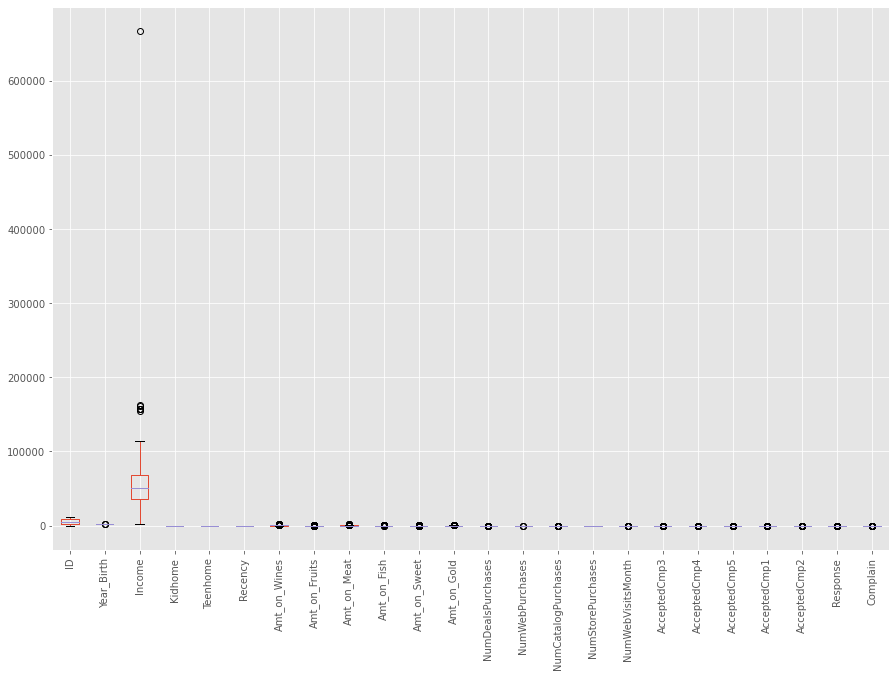

In [108]:
# checking outlier
fig, ax = plt.subplots(figsize=(15, 10)) 
df.boxplot(ax=ax)
plt.xticks(rotation = 90)
plt.show()

this show that there is outlier in income


In [109]:
# Determine the row of the outlier
df.query(" Income > 600000")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Date_Enrollment,Recency,Amt_on_Wines,Amt_on_Fruits,Amt_on_Meat,Amt_on_Fish,Amt_on_Sweet,Amt_on_Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,Saudi Arabia


In [110]:
#removing the outlier
df = df.drop(527)

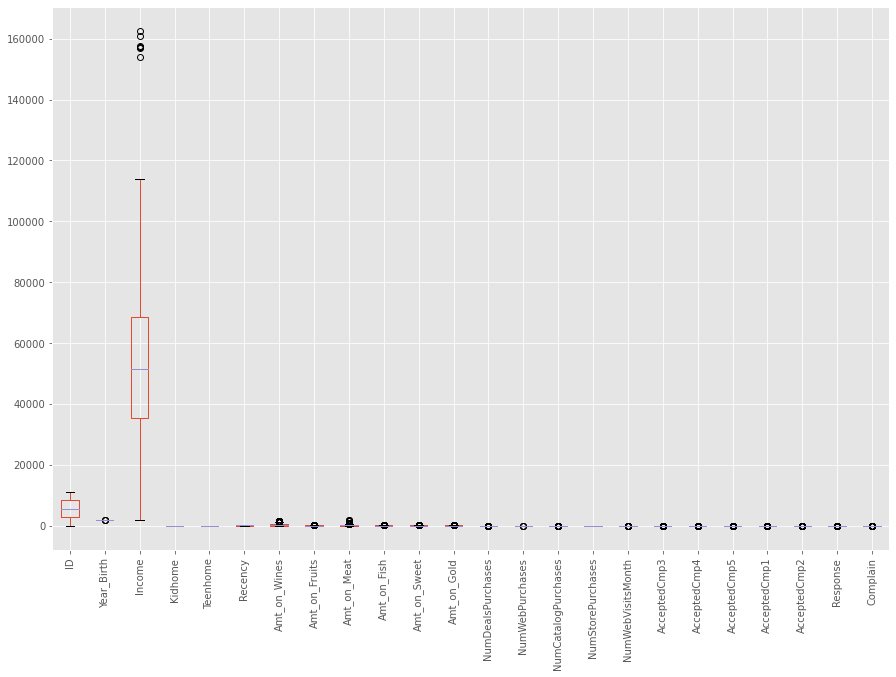

In [111]:
fig, ax = plt.subplots(figsize=(15, 10)) 
df.boxplot(ax=ax)
plt.xticks(rotation = 90)
plt.show()

In [112]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Date_Enrollment,Recency,Amt_on_Wines,Amt_on_Fruits,Amt_on_Meat,Amt_on_Fish,Amt_on_Sweet,Amt_on_Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,USA
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,Spain
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,Spain
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,India


EDA

In [113]:
# total number of unique customers 
unique_customer = df['ID'].nunique()
print(f" Total number of unique customers is:  {unique_customer}")

 Total number of unique customers is:  2215


In [114]:
#customer count by education
education_count = df['Education'].value_counts()

# percentage of customers count by education
total_cus = education_count.sum()
edu_percentage = (education_count / total_cus)*100
print("Education Counts:\n", education_count)
print("\nEnducation Percentage:\n", edu_percentage.apply(lambda x: '{:.2f}%'.format(x)))

Education Counts:
 Graduation    1115
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

Enducation Percentage:
 Graduation    50.34%
PhD           21.72%
Master        16.48%
2n Cycle       9.03%
Basic          2.44%
Name: Education, dtype: object


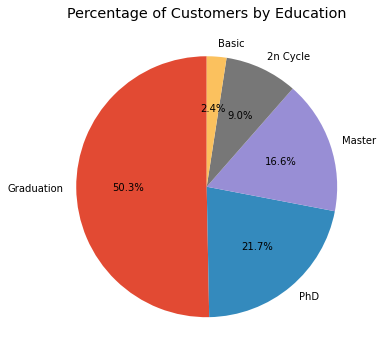

In [115]:
# chart of education percentage
fig = plt.figure(figsize = (6,6))
labels = ['Graduation', 'PhD', 'Master', '2n Cycle', 'Basic']
size = [50.36, 21.71, 16.57, 9.03, 2.44]
plt.pie(size, labels = labels, autopct = '%1.1f%%', startangle = 90)
plt.title('Percentage of Customers by Education')
plt.show()

it can be deduce from the graph that the majority of the customers are Graduate Level


In [116]:
#customer count by marita status
count_marital_status = df['Marital_Status'].value_counts()

# percentage of customers count by marital status
total_marital_status = count_marital_status.sum()
marital_status_percentage = (count_marital_status / total_marital_status)*100
print("marital_status:\n", count_marital_status)
print("\nmarital status Percentage:\n", marital_status_percentage.apply(lambda x: '{:.2f}%'.format(x)))

marital_status:
 Married     857
Together    572
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

marital status Percentage:
 Married     38.69%
Together    25.82%
Single      21.26%
Divorced    10.47%
Widow        3.43%
Alone        0.14%
Absurd       0.09%
YOLO         0.09%
Name: Marital_Status, dtype: object


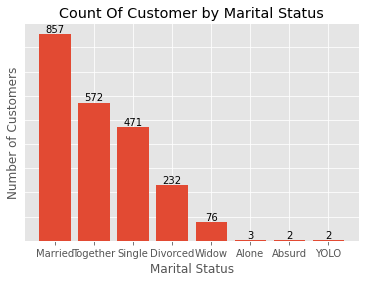

In [117]:
# creating bar chart for the count of marital statu
plt.bar(count_marital_status.index, count_marital_status)
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.title('Count Of Customer by Marital Status')
for i, v in enumerate(count_marital_status.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.show()


comment

In [118]:
# creating a new column for the total amount spent
df["total_amountspent"] = df.Amt_on_Wines + df.Amt_on_Fruits + df.Amt_on_Meat + df.Amt_on_Fish + df.Amt_on_Sweet +df.Amt_on_Gold

In [119]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Date_Enrollment,Recency,Amt_on_Wines,Amt_on_Fruits,Amt_on_Meat,Amt_on_Fish,Amt_on_Sweet,Amt_on_Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,total_amountspent
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,Spain,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,Canada,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,USA,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,Australia,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,Spain,91


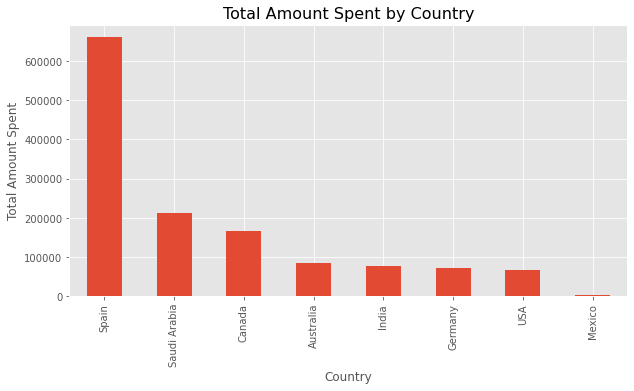

In [120]:
plt.figure(figsize=(10,5))
df.groupby('Country')['total_amountspent'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Amount Spent by Country', size=16)
plt.ylabel('Total Amount Spent');

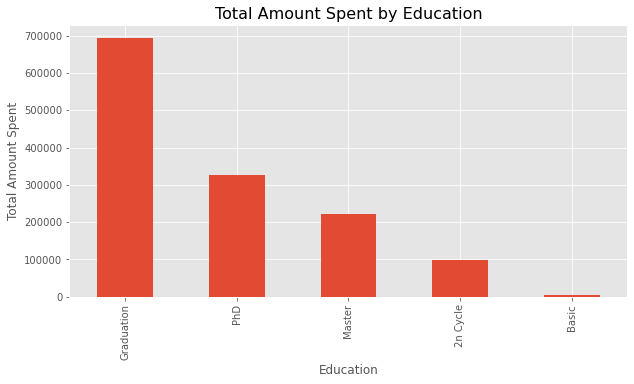

In [121]:
plt.figure(figsize=(10,5))
df.groupby('Education')['total_amountspent'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Amount Spent by Education', size=16)
plt.ylabel('Total Amount Spent');

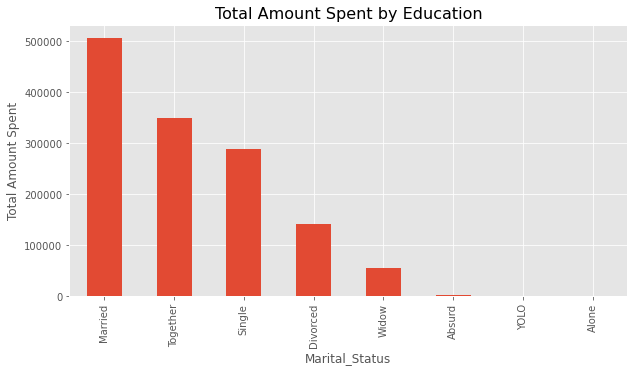

In [122]:
plt.figure(figsize=(10,5))
df.groupby('Marital_Status')['total_amountspent'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Amount Spent by Education', size=16)
plt.ylabel('Total Amount Spent');

In [123]:
Acceptances = ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
list(enumerate(Acceptances))

[(0, 'AcceptedCmp1'),
 (1, 'AcceptedCmp2'),
 (2, 'AcceptedCmp3'),
 (3, 'AcceptedCmp4'),
 (4, 'AcceptedCmp5')]

In [124]:
for i in Acceptances :
    count = df[i].value_counts()
    print (count)

0    2073
1     142
Name: AcceptedCmp1, dtype: int64
0    2185
1      30
Name: AcceptedCmp2, dtype: int64
0    2052
1     163
Name: AcceptedCmp3, dtype: int64
0    2051
1     164
Name: AcceptedCmp4, dtype: int64
0    2053
1     162
Name: AcceptedCmp5, dtype: int64


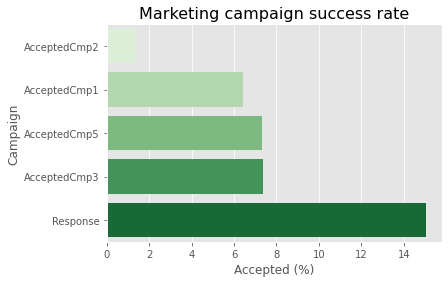

In [125]:
# calculate success rate (percent accepted)
Accept_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp5', 'AcceptedCmp5', 'Response']].mean()*100, columns =['percent']).reset_index()


sns.barplot(x='percent', y='index', data=Accept_success.sort_values('percent'), palette='Greens')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16);

total NumWebPurchases is 9050
total NumCatalogPurchases is 5918
total NumStorePurchases is 12852


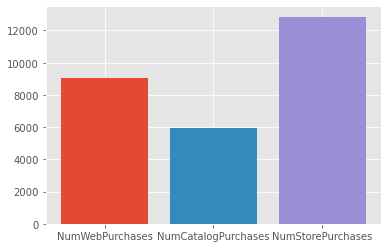

In [126]:
# total number of purchase on each platform
platforms = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' ]
for platform in platforms:
    total = df[platform].sum()
    print(f"total {platform} is {total}")
    plt.bar( platform, total )
    

Total Amt_on_Wines is 676074
Total Amt_on_Fruits is 58391
Total Amt_on_Meat is 370045
Total Amt_on_Fish is 83397
Total Amt_on_Sweet is 59895
Total Amt_on_Gold is 97415


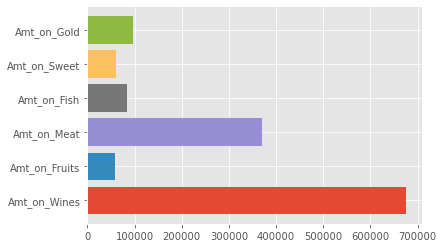

In [127]:
products = ['Amt_on_Wines', 'Amt_on_Fruits', 'Amt_on_Meat', 'Amt_on_Fish', 'Amt_on_Sweet', 'Amt_on_Gold' ]
for product in products:
    total = df[product].sum()
    print(f"Total {product} is {total}")
    plt.barh( product, total )
    